<a href="https://colab.research.google.com/github/RashelGarg/Exploratory-Data-Analysis/blob/main/EDA_Th_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#https://github.com/RashelGarg/Exploratory-Data-Analysis

# RASHEL GARG 21BDS0331
#EDA THEORY DA

Module 2: Data Transformation

In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/telco customer churn.csv')
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


<ipython-input-9-6f0276a5ed6a>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


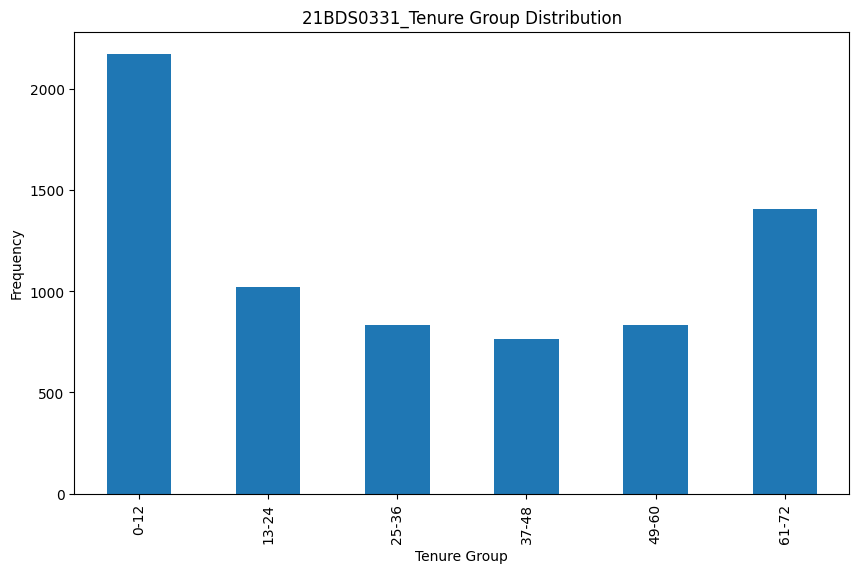

In [9]:
import matplotlib.pyplot as plt
# Convert 'TotalCharges' and 'tenure' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

# Replace missing values in 'TotalCharges' with the median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Data deduplication
df = df.drop_duplicates()

# Discretization (e.g., binning 'tenure' into categories)
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72],
                              labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])

# Visualization of tenure_group distribution
plt.figure(figsize=(10, 6))
df['tenure_group'].value_counts().sort_index().plot(kind='bar')
plt.title("21BDS0331_Tenure Group Distribution")
plt.xlabel("Tenure Group")
plt.ylabel("Frequency")
plt.show()

Module 3: Correlation Analysis and Time Series Analysis

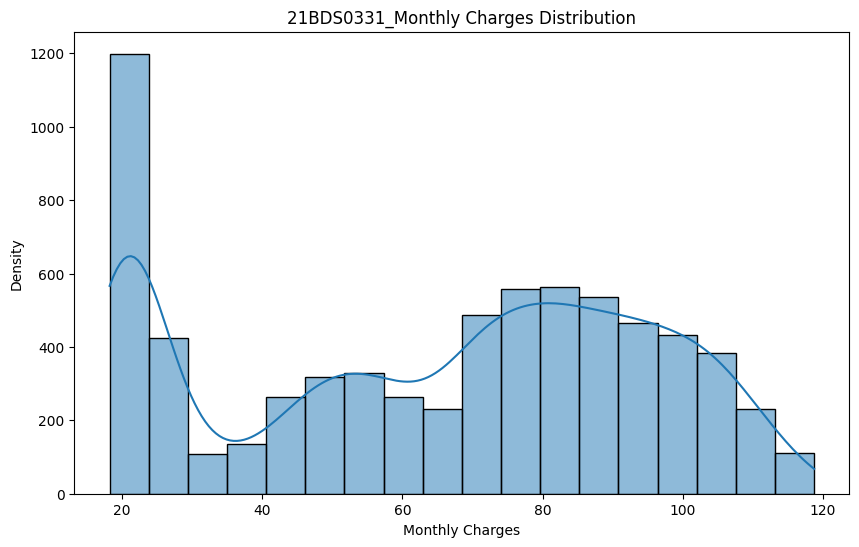

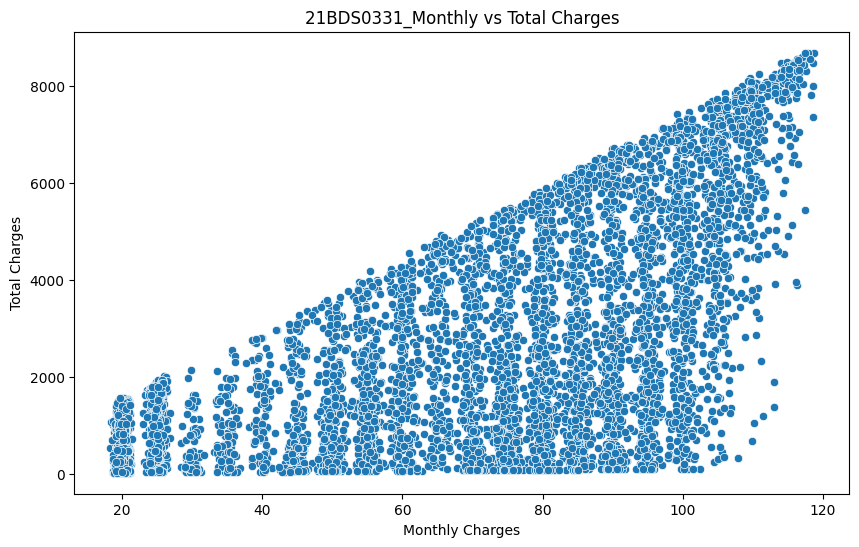

In [10]:
import seaborn as sns

# Univariate Analysis (e.g., Distribution of MonthlyCharges)
plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title("21BDS0331_Monthly Charges Distribution")
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.show()

# Bivariate Analysis (e.g., Scatter plot of MonthlyCharges vs. TotalCharges)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df)
plt.title("21BDS0331_Monthly vs Total Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Total Charges")
plt.show()


Module 4: Data Summarization and Visualization

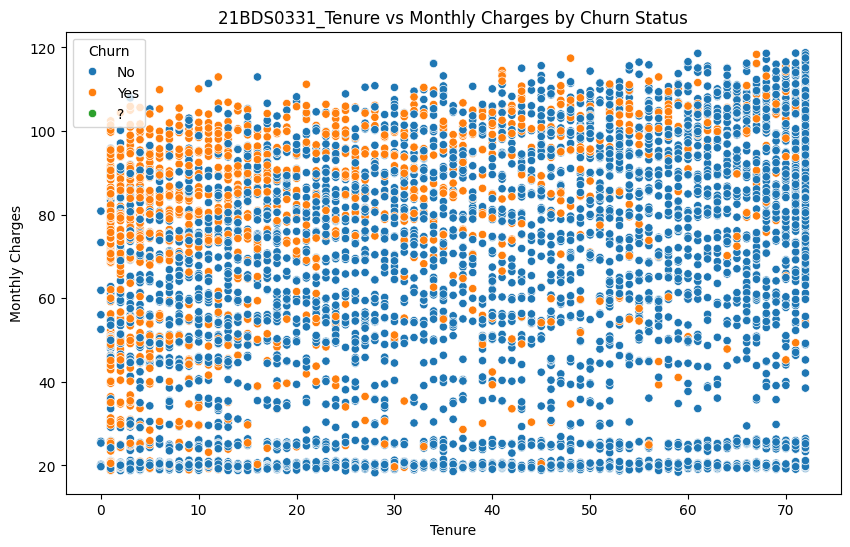

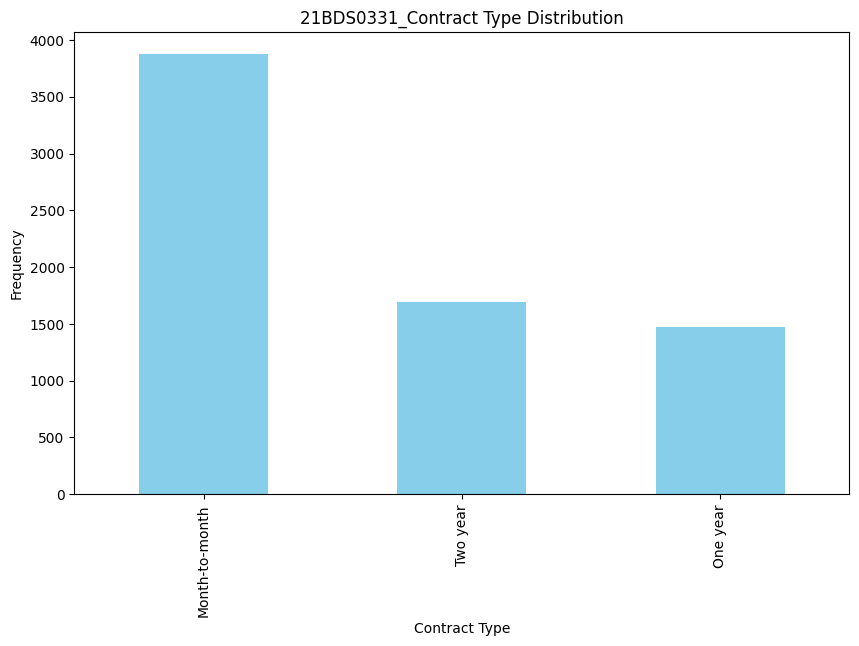

In [11]:
# Scatter plot example
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)
plt.title("21BDS0331_Tenure vs Monthly Charges by Churn Status")
plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")
plt.show()

# Bar plot example: Churn by contract type
plt.figure(figsize=(10, 6))
df['Contract'].value_counts().plot(kind='bar', color='skyblue')
plt.title("21BDS0331_Contract Type Distribution")
plt.xlabel("Contract Type")
plt.ylabel("Frequency")
plt.show()
